# This is the Multi-Label classification problem

**Importing python libraries**

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import warnings
import pickle
import time
import re
warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline

In [2]:
# Reading Dataset from CSV
df = pd.read_csv("recipes_82k.csv")
print(df.shape)
# Selection of rows for non-NAN tags
df = df[df.tags.notna()]
df.shape

(82245, 9)


(82011, 9)

In [3]:
df.head(5)

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
0,NaN,['Set the racks in the middle and upper thirds...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,NaN,['Place the eggs in the air fryer basket and c...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,NaN,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,NaN,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],https://www.skinnytaste.com/wp-content/uploads...,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,NaN,['Cook potatoes in a large pot of salted water...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."


In [4]:
tag_list = df.tags.dropna().tolist()
len(tag_list)
print(tag_list[:1][:2])

['Dairy Free, Gluten Free, Keto Recipes, Kid Friendly, Low Carb, Under 30 Minutes']


# Data Cleaning

In [5]:
new_df = df.copy()
new_df['tags'] = new_df['tags'].apply(lambda x: x.split(','))

In [6]:
all_tags = [item for sublist in new_df['tags'].values for item in sublist]
all_tags = [i.strip() for i in all_tags]

In [7]:
unique_tags = list(set(all_tags))
len(unique_tags)

765

In [8]:
flat_list = [item for sublist in new_df['tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

**Tags**

In [9]:
tags_features

['Vegetable',
 'Gluten Free',
 'Main Dish',
 'Fruit',
 'Meat',
 'Easy',
 'Low Sodium',
 'Dessert',
 'American',
 'Cheese',
 'Side Dish',
 'Dairy Recipes',
 'Appetizer',
 'Low-Fat',
 'Holiday',
 'Lunch',
 'Poultry',
 'Vegan',
 'Tomato',
 'High Fiber',
 'Recipes for a Crowd',
 'Nut Recipes',
 'Easy Main Dish',
 'Chicken',
 'Shellfish Recipes',
 'Vegetarian',
 'Baking',
 'Grilling',
 'Chocolate',
 'Beef',
 'Salad Recipes',
 'Fish',
 'Sauteing Recipes',
 'Beans and Legumes',
 'European Recipes',
 'Recipes for Parties',
 'Healthy',
 'Easy Side Dish Recipes',
 'Italian',
 'Egg Recipes',
 'Grain Recipes',
 'Potato',
 'Pureeing Recipes',
 'Sugar',
 'Pork',
 'Easy Dessert Recipes',
 'Roasting',
 'Low Calorie',
 'Easy Lunch Recipes',
 'Low-Carb',
 'Lemon',
 'Easy Baking',
 'Breakfast',
 'Rice Recipes',
 'Pasta Recipes',
 'Shrimp',
 'Sauce Recipes',
 'Brunch',
 'Easy Appetizer',
 'Fruit Dessert Recipes',
 'Bacon Recipes',
 'Mushroom',
 'Apple',
 'Asian',
 'Carrot Recipes',
 'Onion Recipes',
 'Sum

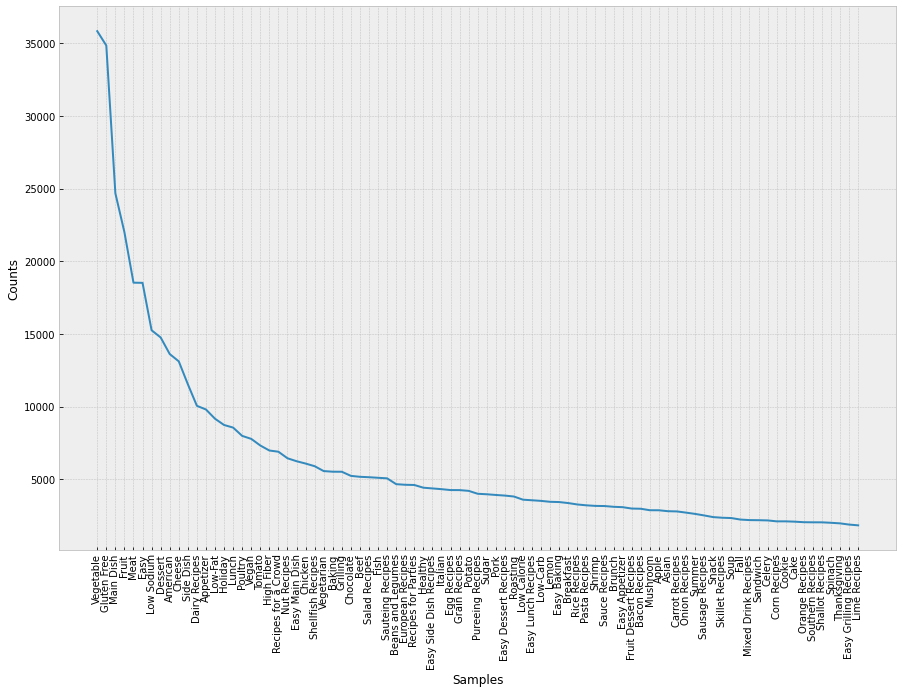

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(85, cumulative=False)

In [11]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [12]:
# new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
new_df['tags'] = new_df['tags'].apply(lambda x: x if len(x)>0 else None)

In [13]:
new_df.columns

Index(['category', 'cooking_method', 'cuisine', 'image', 'ingredients',
       'prep_time', 'recipe_name', 'serves', 'tags'],
      dtype='object')

In [14]:
new_df.dropna(subset=['tags', 'cooking_method', 'cuisine', 'ingredients', 'serves', 'prep_time', 'recipe_name'], inplace=True)

In [15]:
new_df.shape

(58449, 9)

In the next two columns: Body and Title, I'll use lots of text processing:
* Lowering text
* Removing punctuation (but keeping words like c# since it's the most popular tag)
* Lemmatizing words
* Removing stop words

# Pre-Processing

**Spliting the sentances of the 3 features into list of string**

In [16]:
temp_df = new_df.drop(columns=['category', 'image']).copy()
temp_df['ingredients'] = temp_df['ingredients'].apply(lambda x: x.split(' '))
temp_df['cooking_method'] = temp_df['cooking_method'].apply(lambda x: x.split(' '))
temp_df['recipe_name'] = temp_df['recipe_name'].apply(lambda x: x.split(' '))
temp_df.head()

,cooking_method,cuisine,ingredients,prep_time,recipe_name,serves,tags
0,"[['Set, the, racks, in, the, middle, and, uppe...",['American'],"[['1, tablespoons, extra, virgin, olive, oil',...",20 minutes,"[Mediterranean, Sea, Bass]",4 servings,"[Dairy Free, Gluten Free, Keto Recipes, Kid..."
1,"[['Place, the, eggs, in, the, air, fryer, bask...",['American'],"[['4, large, eggs',, 'Salt, (black, pepper,, e...",15 minutes,"[Air, Fryer, Hard, Boiled, Eggs]",4 eggs,"[Air Fryer Recipes, Dairy Free, Gluten Free,..."
2,"[['Air, Fryer, directions:',, 'Preheat, air, f...",['American'],"[['olive, oil, spray',, '4, about, 5, ounce, e...",5 minutes,"[Air, Fryer, Basil-Parmesan, Salmon]",4 servings,"[Air Fryer Recipes, Gluten Free, Keto Recipe..."
3,"[['Preheat, the, oven, to, 400F.',, 'Pour, 2, ...",['American'],"[['1/2, cup, freshly, grated, Parmesan, (not, ...",15 minutes,"[Everything, Parmesan, Crisps]",4 servings,"[Gluten Free, Keto Recipes, Kid Friendly, L..."
4,"[['Cook, potatoes, in, a, large, pot, of, salt...",['American'],"[['3, 1/2, pounds, new, potatoes, (about, 10, ...",10 minutes,"[Potato, and, Green, Bean, Salad]",12 servings,"[Dairy Free, Gluten Free, Kid Friendly, Veg..."


**Tokenization, Lemmatization and Stop-Word Removal**

In [17]:
token=ToktokTokenizer()

In [18]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/gaurav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
lemma=WordNetLemmatizer()
# stop_words = set(stopwords.words("english"))

In [21]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/gaurav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
temp_df['recipe_name'] = temp_df['recipe_name'].apply(lambda x: lemitizeWords(x))
temp_df['cooking_method'] = temp_df['cooking_method'].apply(lambda x: lemitizeWords(x))
temp_df['ingredients'] = temp_df['ingredients'].apply(lambda x: lemitizeWords(x))
temp_df.head()

,cooking_method,cuisine,ingredients,prep_time,recipe_name,serves,tags
0,"[ "" [ ' Set "" , ' the ' , ' rack ' , ' in ' , ...",['American'],"[ "" [ ' 1 "" , ' tablespoons ' , ' extra ' , ' ...",20 minutes,"[ ' Mediterranean ' , ' Sea ' , ' Bass ' ]",4 servings,"[Dairy Free, Gluten Free, Keto Recipes, Kid..."
1,"[ "" [ ' Place "" , ' the ' , ' egg ' , ' in ' ,...",['American'],"[ "" [ ' 4 "" , ' large ' , "" egg ' , "" , "" ' Sa...",15 minutes,"[ ' Air ' , ' Fryer ' , ' Hard ' , ' Boiled ' ...",4 eggs,"[Air Fryer Recipes, Dairy Free, Gluten Free,..."
2,"[ "" [ ' Air "" , ' Fryer ' , "" directions : ' ,...",['American'],"[ "" [ ' olive "" , ' oil ' , "" spray ' , "" , "" ...",5 minutes,"[ ' Air ' , ' Fryer ' , ' Basil-Parmesan ' , '...",4 servings,"[Air Fryer Recipes, Gluten Free, Keto Recipe..."
3,"[ "" [ ' Preheat "" , ' the ' , ' oven ' , ' to ...",['American'],"[ "" [ ' 1/2 "" , ' cup ' , ' freshly ' , ' grat...",15 minutes,"[ ' Everything ' , ' Parmesan ' , ' Crisps ' ]",4 servings,"[Gluten Free, Keto Recipes, Kid Friendly, L..."
4,"[ "" [ ' Cook "" , ' potatoes ' , ' in ' , ' a '...",['American'],"[ "" [ ' 3 "" , ' 1/2 ' , ' pound ' , ' new ' , ...",10 minutes,"[ ' Potato ' , ' and ' , ' Green ' , ' Bean ' ...",12 servings,"[Dairy Free, Gluten Free, Kid Friendly, Veg..."


# Classifiers

Now our data is almost ready to be put into a classifier.
The parameters in the TFIDF are very important for the performance of our tags.

In [24]:
X1 = temp_df['cooking_method']
X2 = temp_df['recipe_name']
X3 = temp_df['ingredients']
X4 = temp_df['cuisine']
X5 = temp_df['prep_time']
X6 = temp_df['serves']
y = temp_df['tags']

In [25]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [26]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X3 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X4 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X5 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X6 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [27]:
X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)
X3_tfidf = vectorizer_X3.fit_transform(X3)
X4_tfidf = vectorizer_X4.fit_transform(X4)
X5_tfidf = vectorizer_X5.fit_transform(X5)
X6_tfidf = vectorizer_X6.fit_transform(X6)

In [28]:
X_tfidf = hstack([X1_tfidf, X2_tfidf, X3_tfidf, X4_tfidf, X5_tfidf])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

Now it's finally ready. 

**2.2 One vs Rest**

To evaluate our models, I'll use the jacard score since it's the best fitted for multi label classification. 

In [39]:
def avg_jacard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")    

In [45]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, mn, svc, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score: 6.398664003214238
Hamming loss: 2.2067279285317434
---
Clf:  SGDClassifier
Jacard score: 46.54232098550188
Hamming loss: 0.7640793523409735
---
Clf:  LogisticRegression
Jacard score: 47.16389565038341
Hamming loss: 0.7666809238665526
---
Clf:  MultinomialNB
Jacard score: 36.95061147316674
Hamming loss: 1.2274346740980484
---
Clf:  LinearSVC
Jacard score: 53.158534152244904
Hamming loss: 0.7096227280343583
---
Clf:  PassiveAggressiveClassifier
Jacard score: 47.39022271844094
Hamming loss: 0.8655737126630392
---


**2.3 MLP Classifier**

In [46]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score: 51.225579493423204
Hamming loss: 0.7881438889525808
---


**Support Vector Machine which gave better results compared to SGD Classifier, Logistic Regression, Multinomial Naive Bayes, Random Forest  and Passive Aggressive Classifier based on Jaccard Score and Hamming distance.**